In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler

# this is the new url for the large dataset
url = 'https://raw.githubusercontent.com/SarahTaaherBonna/CS3244Project/master/ExtractedFeaturesDataset/extracted_features_LARGE_v4.csv?token=AIQX6SIJAPXGAQ33YKUAHPS53JBWY' 
df = pd.read_csv(url)

In [31]:
# percentage of test data
percentage = 0.2

# split into training and testing data

# #for dataset without oversampling or undersampling
# #separate into inputs and labels
# X = df[['proportion_exclamations_title', 'proportion_question_title', 'proportion_allcaps_title', 'proportion_contractions_title', 'sentiment_title', 'starts_with_number_title',  'starts_with_5W1H_title', 'proportion_of_stop_words_in_title']]
# y = df['label']
# X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size = percentage)
# X_train = preprocessing.normalize(X_train1, norm='l2')

# #for dataset with oversampling
# #separate into inputs and labels
# X = df[['proportion_exclamations_title', 'proportion_question_title', 'proportion_allcaps_title', 'proportion_contractions_title', 'sentiment_title', 'starts_with_number_title',  'starts_with_5W1H_title', 'proportion_of_stop_words_in_title']]
# y = df['label']
# X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = percentage)
# #balance data
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_train = ros.fit_resample(X_train1, y_train1)
# X_train = preprocessing.normalize(X_resampled, norm='l2')

# for dataset with undersampling
num_clickbait = len(df[df['label'] == 0])
non_clickbait_indices = df[df.label == 1].index
random_non_clickbait_indices = np.random.choice(non_clickbait_indices, num_clickbait)
clickbait_indices = df[df.label == 0].index
under_sample_indices = np.concatenate([clickbait_indices, random_non_clickbait_indices])
under_sample = df.loc[under_sample_indices]
X = under_sample[['proportion_exclamations_title', 'proportion_question_title', 'proportion_allcaps_title', 'proportion_contractions_title', 'sentiment_title', 'starts_with_number_title',  'starts_with_5W1H_title', 'proportion_of_stop_words_in_title']]
y = under_sample['label']
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size = percentage)
X_train = preprocessing.normalize(X_train1, norm='l2')

print("total training examples: %d\ntotal test examples: %d" % (len(X_train), len(X_test)))

total training examples: 23643
total test examples: 5911


In [32]:
from sklearn.model_selection import validation_curve

# set up sklearn logistic regression
regularisation_vals = [1e-10, 1e-5, 1e-2, 0.1, 0.25, 0.4, 0.5, 0.75, 1.0, 1.25, 1.5, 10, 100, 1000, 1e5, 1e10, 1e15, 1e20] # an array of values, to find out which is the best C 
best_accuracy = 0
best_reg_val = regularisation_vals[0]

model = ""

for i in range(len(regularisation_vals)):
  reg_val = regularisation_vals[i]
  model = LogisticRegression(C=reg_val, solver = 'liblinear')

  cv = cross_val_score(model, X_train, y_train, cv=10)
  # print("Accuracy of different folds: {}".format(cv))
  print("The mean accuracy of all folds: {}".format(cv.mean()))
  if cv.mean() > best_accuracy:
    best_accuracy = cv.mean()
    best_reg_val = reg_val

print("best regularisation value = %3.9f" % best_reg_val)

train_scores, valid_scores = validation_curve(model, X_train, y_train, param_name="C", param_range=regularisation_vals, cv=10)

The mean accuracy of all folds: 0.5482376801457746
The mean accuracy of all folds: 0.5507329672930643
The mean accuracy of all folds: 0.5768293299860769
The mean accuracy of all folds: 0.5803822720091019
The mean accuracy of all folds: 0.5813973753825332
The mean accuracy of all folds: 0.5823277510616374
The mean accuracy of all folds: 0.5828776486183486
The mean accuracy of all folds: 0.5826661963551905
The mean accuracy of all folds: 0.5825392391277446
The mean accuracy of all folds: 0.5825815224258418
The mean accuracy of all folds: 0.582793010491949
The mean accuracy of all folds: 0.5831314200128304
The mean accuracy of all folds: 0.5833006068793658
The mean accuracy of all folds: 0.5833006068793658
The mean accuracy of all folds: 0.5833006068793658
The mean accuracy of all folds: 0.5833006068793658
The mean accuracy of all folds: 0.5833006068793658
The mean accuracy of all folds: 0.5833006068793658
best regularisation value = 100.000000000


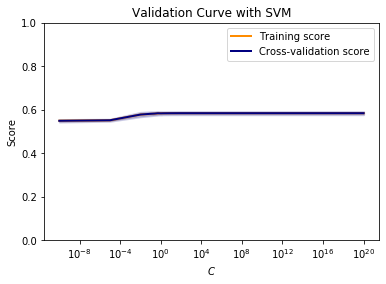

In [33]:
import matplotlib.pyplot as plt

param_range = regularisation_vals

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$C$")
plt.ylabel("Score")
plt.ylim(0.0, 1.0)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [34]:
improved_model = LogisticRegression(C= best_reg_val, solver = 'liblinear')
improved_model.fit(X_train, y_train)

y_pred = improved_model.predict(X_test)
print("classification accuracy: {}".format(accuracy_score(y_test, y_pred)))

# get confusion matrix for visualisation
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("F1-Score: ", f1)
print("Confusion Matrix: ")
print(cm)

classification accuracy: 0.5005921163931653
F1-Score:  0.6636280765724705
Confusion Matrix: 
[[  47 2872]
 [  80 2912]]


In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Non-Normalized Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Non-Normalized Confusion Matrix')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    return ax

In [0]:
def print_cm(y_test, y_pred):
    y_test = np.array(y_test)

    y_pred_output = np.array([1 if y_pred[i] > 0.5 else 0 for i in range(len(y_pred))])
    cm = confusion_matrix(y_test, y_pred_output)

    class_names = ["non-clickbait", "clickbait"]
    plot_confusion_matrix(y_test, y_pred_output, classes=class_names,
                          title='Non-Normalized Confusion Matrix (Log Reg)')

    # Plot normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred_output, classes=class_names, normalize=True,
                          title='Normalized Confusion Matrix (Log Reg)')

    plt.show()

Non-Normalized Confusion Matrix
[[  47 2872]
 [  80 2912]]
Normalized confusion matrix
[[0.0161014  0.9838986 ]
 [0.02673797 0.97326203]]


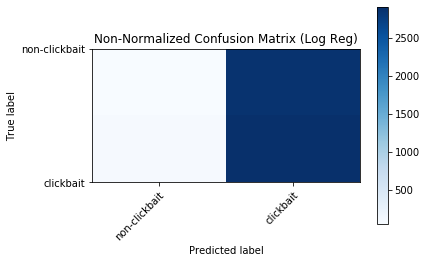

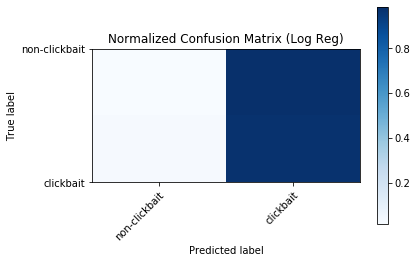

In [37]:
print_cm(y_test, y_pred)